#Segmentação de clientes usando Python

Os dados são relacionados a indicadores financeiros de clientes de cartão de crédito, dentre limite do cartão, idade do cliente e percentual de uso do cartão. O objetivo do estudo é agrupar os clientes para que assim seja possível criar um plano de ação de marketing para cada grupo, dadas as suas características.

* Referência: https://github.com/CGrannan/Customer_Segmentation_With_R/blob/master/Customer_Segmentation_Using_Python.ipynb

#Introdução

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1)
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
#leitura da base
data = pd.read_excel('Limite3.xlsx')
data.head()

,CLIENTE,LIMITE,IDADE,PERC_USO_CARTAO
0,1,2000,24,0.195650
1,2,12000,26,0.022350
2,3,9000,34,0.324878
3,4,5000,37,0.939800
4,5,5000,57,0.172340


#Análise Exploratória de Dados

In [ ]:
data.iloc[:, 1:4].describe()

,LIMITE,IDADE,PERC_USO_CARTAO
count,30000.000000,30000.000000,30000.000000
mean,16748.432267,35.466567,0.423771
std,12974.766157,9.168890,0.411462
min,1000.000000,21.000000,-0.619892
25%,5000.000000,28.000000,0.022032
50%,14000.000000,34.000000,0.313994
75%,24000.000000,41.000000,0.829843
max,100000.000000,79.000000,6.455300


Text(0.5, 1.0, 'PERC_USO_CARTAO')

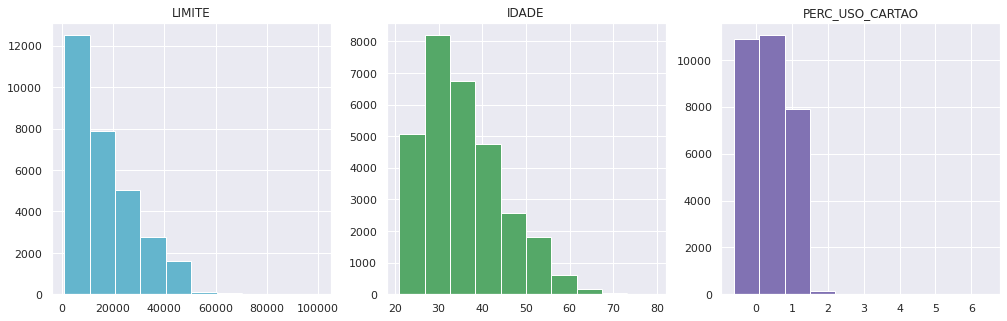

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (17,5))
axs[0].hist(data["LIMITE"], color = 'c')
axs[0].set_title('LIMITE')
axs[1].hist(data["IDADE"], color = 'g')
axs[1].set_title('IDADE')
axs[2].hist(data["PERC_USO_CARTAO"], color = 'm')
axs[2].set_title('PERC_USO_CARTAO')

Analisando os histogramas, é possível concluir que as distribuições das variáveis não são simétricas, mas sim assimétricas à esquerda.

Text(0.5, 1.0, 'PERC_USO_CARTAO')

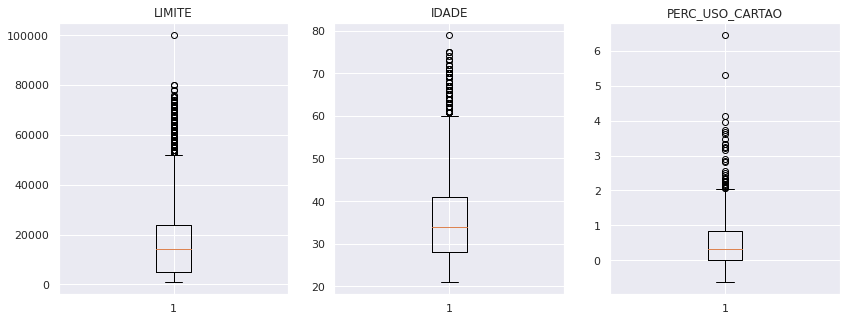

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (14,5))
axs[0].boxplot(data["LIMITE"])
axs[0].set_title('LIMITE')
axs[1].boxplot(data["IDADE"])
axs[1].set_title('IDADE')
axs[2].boxplot(data["PERC_USO_CARTAO"])
axs[2].set_title('PERC_USO_CARTAO')

A partir dos boxplots acima e dos dados estatísticos obtidos através da função `describe()`, nota-se que 75% dos clientes apresentam limites de até 24.000 unidades monetárias, idades entre 21 e 41 anos e percentuais de uso dos cartões de crédito entre -62% e 83%.

#Determinando o número de clusters

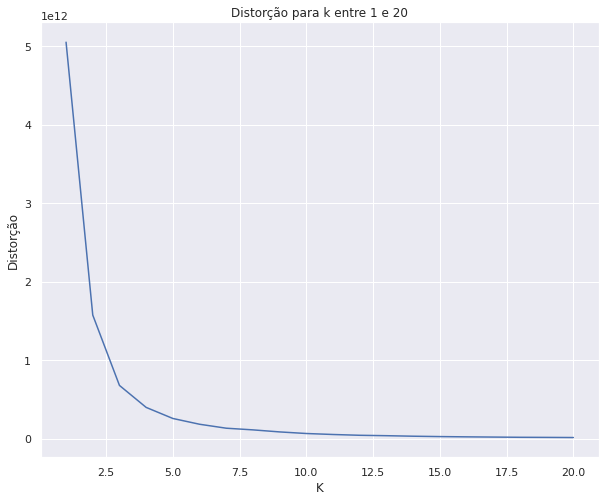

In [ ]:
# Obtendo o "gráfico de cotovelo" para determinar o número ideal de clusters
k_range = range(1,21)
X = data[['LIMITE', 'IDADE', 'PERC_USO_CARTAO']]
erro = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(X)
    erro.append(model.inertia_)

fig = plt.figure(figsize=(10,8))
sns.lineplot(x=k_range, y=erro)
plt.title('Distorção para k entre 1 e 20')
plt.xlabel('K')
plt.ylabel('Distorção')
plt.show()

A partir do gráfico acima, nota-se que o ponto em que a inclinação do gráfico muda dramaticamente é em torno de k = 3. Logo, será criado um modelo de agrupamento usando 3 clusters.

#Criando o modelo

In [ ]:
#Padronização dos dados
new_data = pd.DataFrame(scale(X), index=X.index, columns=X.columns)
new_data

,LIMITE,IDADE,PERC_USO_CARTAO
0,-1.136720,-1.250616,-0.554426
1,-0.365981,-1.032483,-0.975613
2,-0.597202,-0.159953,-0.240351
3,-0.905498,0.167246,1.254154
4,-0.905498,2.348571,-0.611078
...,...,...,...
29995,0.404759,0.385378,1.057424
29996,-0.134759,0.821643,-1.002663
29997,-1.059646,0.167246,-0.741120
29998,-0.674276,0.603511,-1.079908


In [ ]:
#Criando modelo com k = 3
model_k3 = KMeans(n_clusters=3) 
data['cluster'] = pd.DataFrame(model_k3.fit_predict(new_data[['LIMITE', 
                                                                      'IDADE',
                                                                      'PERC_USO_CARTAO']]))

In [ ]:
#Verificação dos centros dos clusters
model_k3.cluster_centers_

array([[-0.4660834 ,  1.29467208,  0.46736039],
       [ 0.8604625 ,  0.01852326, -0.76305814],
       [-0.63084744, -0.74976252,  0.52894468]])

#Análise e Visualização dos dados

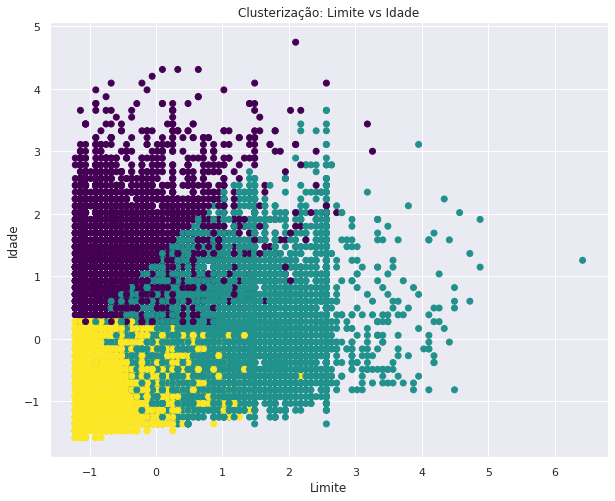

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(new_data['LIMITE'], new_data['IDADE'], c=data['cluster'], cmap = 'viridis')
plt.title('Clusterização: Limite vs Idade')
plt.xlabel('Limite')
plt.ylabel('Idade')
plt.show()

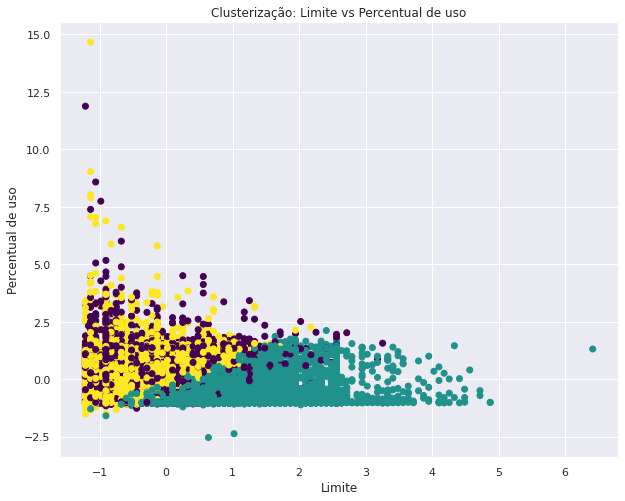

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(new_data['LIMITE'], new_data['PERC_USO_CARTAO'], c=data['cluster'], cmap = 'viridis')
plt.title('Clusterização: Limite vs Percentual de uso')
plt.xlabel('Limite')
plt.ylabel('Percentual de uso')
plt.show()

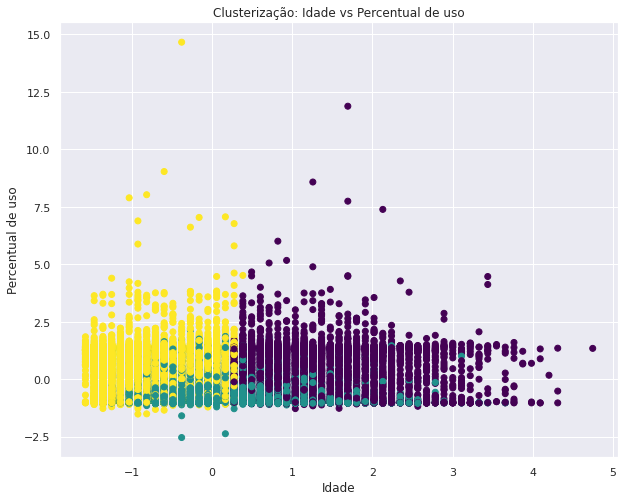

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(new_data['IDADE'], new_data['PERC_USO_CARTAO'], c=data['cluster'], cmap = 'viridis')
plt.title('Clusterização: Idade vs Percentual de uso')
plt.xlabel('Idade')
plt.ylabel('Percentual de uso')
plt.show()

In [ ]:
#Análise de componentes principais (PCA)
reduced_data = PCA(n_components=2).fit_transform(new_data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

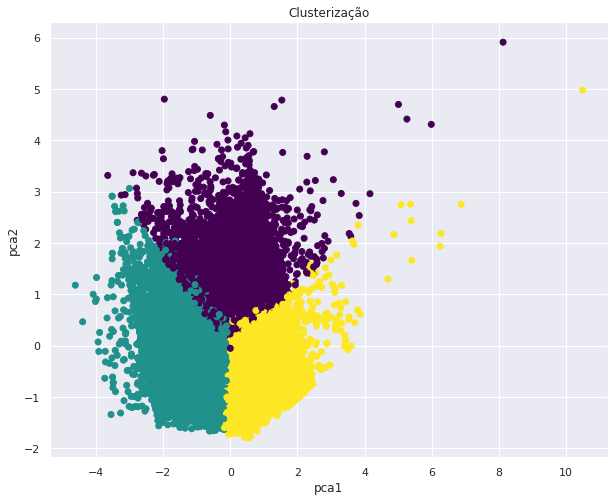

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.scatter(results.pca1, results.pca2, c=data['cluster'], cmap = 'viridis')
plt.title('Clusterização')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

In [ ]:
#Verificando a quantidade de clientes por cluster
pd.DataFrame(data.value_counts('cluster')).sort_values(by='cluster')

,0
cluster,
0,6472
1,11937
2,11591


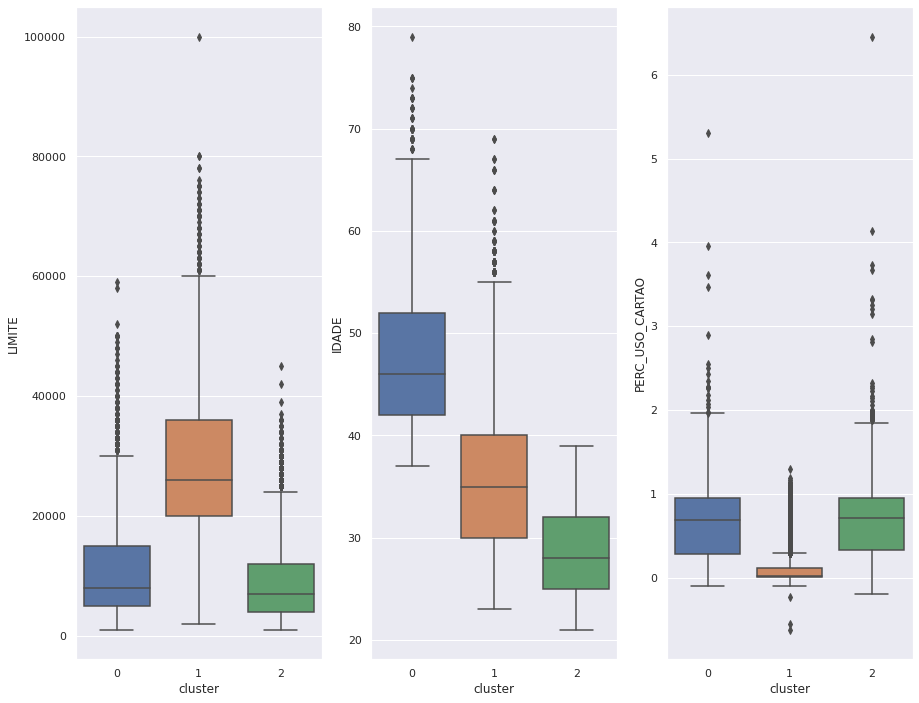

In [ ]:
#Analisando a distribuicao das variáveis por cluster a partir de boxplots
fig, axs = plt.subplots(ncols=3, figsize = (15,12))
sns.boxplot(x='cluster', y='LIMITE', data=data, ax=axs[0])
sns.boxplot(x='cluster', y='IDADE', data=data, ax=axs[1])
sns.boxplot(x='cluster', y='PERC_USO_CARTAO', data=data, ax=axs[2])